In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os


In [160]:
# --- Parámetros conocidos ---

R = 100  # resistencia en ohms
C = 10e-6   # capacitancia en faradios (10 microfaradios)


In [161]:
# --- Cálculo de la función de trasferencia y fase ---

path = "data/cleaned_data.csv"
df = pd.read_csv(path)

frequencies = df["Freq"].values
v_in = df["V_in"].values
v_out = df["V_out"].values

T = np.abs(v_out / v_in)    # Función de transferencia
A = 20 * np.log10(T)    # Amplitud en dB

# Caluclo de fase (o defase) teórica: ϕ(ω)=arg(H(jω))=−arctan(ωRC)
omega = 2 * np.pi * frequencies
fase_r = -np.arctan(omega * R * C) # Defase en radianes
fase_d = np.degrees(fase_r)   # Defase en grados

# Frecuencia de corte: fc = 1 / (2 * pi * R * C) = 1 / (2 * pi * ω0 )
omega_0 = 1 / (R * C)
fc = omega_0 / (2 * np.pi)

# ω/ω0
omega_0_ratio = omega / omega_0


In [162]:
# --- Cálculo de incertezas ---
delta_vin = 0.03    # Asumimos incertidumbres constantes aproximadas 
delta_vout = 0.03

T = np.abs(v_out / v_in)
T_err = T * np.sqrt((delta_vin / v_in)**2 + (delta_vout / v_out)**2)

A_err = 20 / np.log(10) * T_err / T  # Propagación del error a través del logaritmo




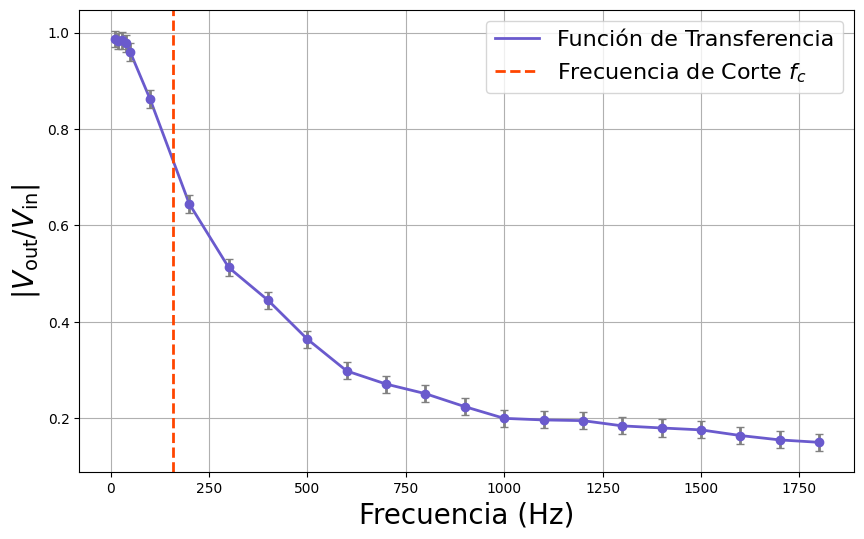

In [163]:
# --- Gráficos ---

# --- Gráfico 1:Frecuencia de la señal de entrada vs Función de transferencia ---
plt.figure(figsize=(10, 6))
plt.plot(frequencies, T, label='Función de Transferencia', color='slateblue', linewidth=2)
# plt.scatter(frequencies, T, color='blue', s=20)  # Puntos de datos
plt.errorbar(frequencies, T, yerr=T_err, fmt='o', color='slateblue', ecolor='gray', elinewidth=2, capsize=3)
#plt.xscale('log')
plt.xlabel('Frecuencia (Hz)', fontsize=20)
plt.ylabel(r'$|V_\mathrm{out} / V_\mathrm{in}|$', fontsize=20)
#plt.title('Frecuencia vs Función de Transferencia')
plt.axvline(fc, color='orangered', linestyle='--', label=r'Frecuencia de Corte $f_c$', linewidth=2)
plt.legend(fontsize=16)
plt.grid()
plt.savefig('transfer_function.png')
plt.show()

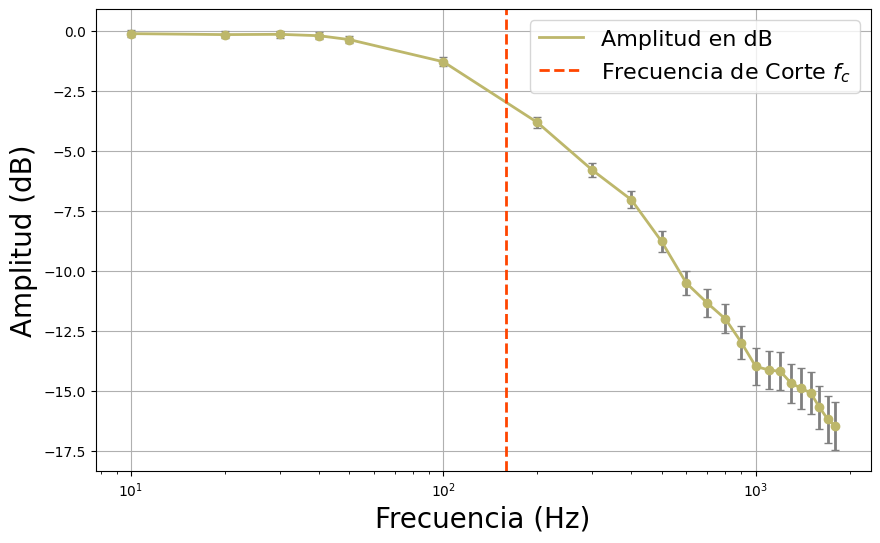

In [164]:
# --- Gráfico 2:Frecuencia de la señal de entrada vs Amplitud en dB ---
plt.figure(figsize=(10, 6))
plt.plot(frequencies, A, label='Amplitud en dB', color='darkkhaki', linewidth=2)
plt.errorbar(frequencies, A, yerr=A_err, fmt='o', color='darkkhaki', ecolor='gray', elinewidth=2, capsize=3)
plt.scatter(frequencies, A, color='orange', s=20)  # Puntos
plt.xscale('log')
plt.xlabel('Frecuencia (Hz)', fontsize=20)
plt.ylabel('Amplitud (dB)', fontsize=20)
plt.axvline(fc, color='orangered', linestyle='--', label=r'Frecuencia de Corte $f_c$', linewidth=2)
plt.legend(fontsize=16)
plt.grid()
plt.savefig('amplitude_db.png')
plt.show()


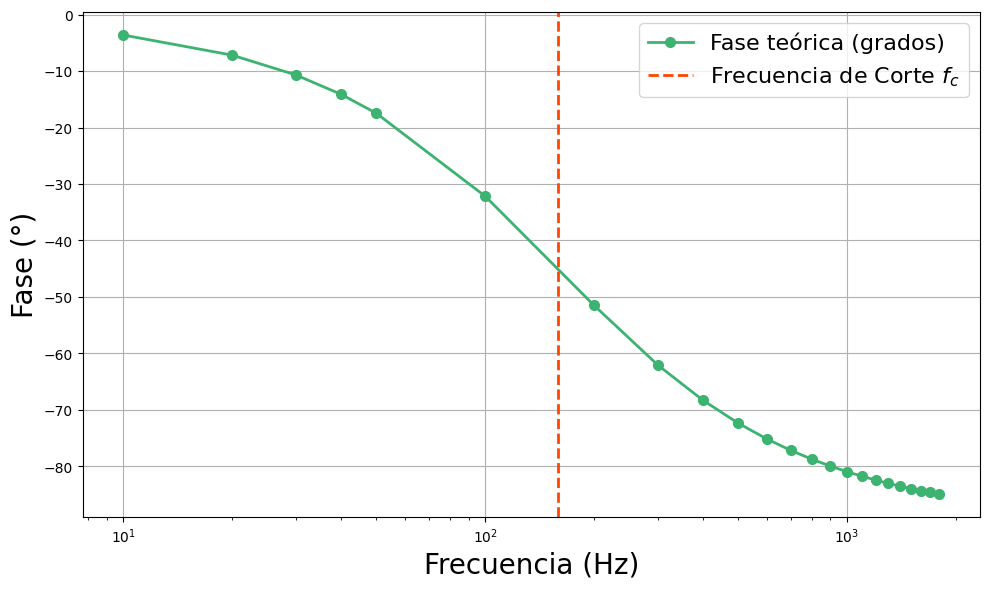

In [170]:
# --- Gráfico: Frecuencia vs Fase (en grados) --- (en escala logarítmica)
plt.figure(figsize=(10, 6))
plt.plot(frequencies, fase_d, 'o-', color='mediumseagreen', label='Fase teórica (grados)', linewidth=2, markersize=7)
plt.axvline(fc, color='orangered', linestyle='--', label=r'Frecuencia de Corte $f_c$', linewidth=2)
plt.xlabel('Frecuencia (Hz)', fontsize=20)
plt.ylabel('Fase (°)', fontsize=20)
plt.xscale('log')
plt.grid(True)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('phase_vs_frequency.png')
plt.show()
